In [54]:
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install scipy
!pip install xgboost
!pip install kaggle 
!pip install imblearn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [56]:
!kaggle competitions download -c playground-series-s3e22


  0%|          | 0.00/59.7k [00:00<?, ?B/s]
100%|██████████| 59.7k/59.7k [00:00<00:00, 412kB/s]
100%|██████████| 59.7k/59.7k [00:00<00:00, 412kB/s]


In [59]:
_TRAIN_FILE = "train.csv"
_TEST_FILE = "test.csv"

_SEED = 42

In [58]:
!unzip playground-series-s3e22.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [60]:
train_df = pd.read_csv(_TRAIN_FILE)
submit_df = pd.read_csv(_TEST_FILE)

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [57]:
import pandas as pd
import glob
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

Data Processing 

In [61]:
path = "C:/Users/user/Downloads/train.csv"
df = pd.read_csv(path)
df.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,absent,slight,slight,less_1_liter,6.5,decreased,distend_small,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,absent,moderate,none,more_1_liter,2.0,absent,distend_small,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,extreme_pain,hypomotile,moderate,slight,none,3.5,NaN,distend_large,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,mild_pain,hypomotile,moderate,slight,more_1_liter,2.0,decreased,distend_small,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,alert,hypomotile,none,slight,less_1_liter,7.0,normal,normal,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [62]:
# Remove id and hospital number column
df = df.drop(['id','hospital_number'], axis=1)
df.head()




,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,yes,adult,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,absent,slight,slight,less_1_liter,6.5,decreased,distend_small,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,yes,adult,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,absent,moderate,none,more_1_liter,2.0,absent,distend_small,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,yes,adult,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,extreme_pain,hypomotile,moderate,slight,none,3.5,NaN,distend_large,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,yes,adult,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,mild_pain,hypomotile,moderate,slight,more_1_liter,2.0,decreased,distend_small,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,no,adult,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,alert,hypomotile,none,slight,less_1_liter,7.0,normal,normal,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [63]:
df.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,yes,adult,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,absent,slight,slight,less_1_liter,6.5,decreased,distend_small,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,yes,adult,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,absent,moderate,none,more_1_liter,2.0,absent,distend_small,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,yes,adult,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,extreme_pain,hypomotile,moderate,slight,none,3.5,NaN,distend_large,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,yes,adult,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,mild_pain,hypomotile,moderate,slight,more_1_liter,2.0,decreased,distend_small,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,no,adult,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,alert,hypomotile,none,slight,less_1_liter,7.0,normal,normal,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [64]:
print(df.dtypes)

# Iterate over each column in the DataFrame
for column in df.columns:
    # Get unique values from the column
    unique_values = df[column].unique()
    # Print the column name and its unique values
    print(f"Column '{column}' has unique values: {unique_values}")

# Checking for missing values in the dataset
missing_data = df.isnull().sum()
missing_data 


surgery                   object
age                       object
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
outcome                   object
dtype: object
Column 'surgery' has unique values: ['yes' 'no']
Column 'age' has unique values: ['adult' 'youn

surgery                    0
age                        0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities       39
peripheral_pulse          60
mucous_membrane           21
capillary_refill_time      6
pain                      44
peristalsis               20
abdominal_distention      23
nasogastric_tube          80
nasogastric_reflux        21
nasogastric_reflux_ph      0
rectal_exam_feces        190
abdomen                  213
packed_cell_volume         0
total_protein              0
abdomo_appearance         48
abdomo_protein             0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
outcome                    0
dtype: int64

In [65]:
df.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,yes,adult,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,absent,slight,slight,less_1_liter,6.5,decreased,distend_small,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,yes,adult,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,absent,moderate,none,more_1_liter,2.0,absent,distend_small,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,yes,adult,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,extreme_pain,hypomotile,moderate,slight,none,3.5,NaN,distend_large,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,yes,adult,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,mild_pain,hypomotile,moderate,slight,more_1_liter,2.0,decreased,distend_small,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,no,adult,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,alert,hypomotile,none,slight,less_1_liter,7.0,normal,normal,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [66]:
# Replace 'none' in any case with NaN across the DataFrame using a case-insensitive regex
df.replace(to_replace=[r'(?i)^none$'], value=np.nan, regex=True, inplace=True)

# Check for missing values
missing_data = df.isnull().sum()
print(missing_data)

surgery                    0
age                        0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities       39
peripheral_pulse          60
mucous_membrane           21
capillary_refill_time      6
pain                      44
peristalsis               20
abdominal_distention     235
nasogastric_tube         355
nasogastric_reflux       352
nasogastric_reflux_ph      0
rectal_exam_feces        190
abdomen                  213
packed_cell_volume         0
total_protein              0
abdomo_appearance         48
abdomo_protein             0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
outcome                    0
dtype: int64


In [67]:
df.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,yes,adult,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,absent,slight,slight,less_1_liter,6.5,decreased,distend_small,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,yes,adult,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,absent,moderate,NaN,more_1_liter,2.0,absent,distend_small,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,yes,adult,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,extreme_pain,hypomotile,moderate,slight,NaN,3.5,NaN,distend_large,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,yes,adult,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,mild_pain,hypomotile,moderate,slight,more_1_liter,2.0,decreased,distend_small,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,no,adult,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,alert,hypomotile,NaN,slight,less_1_liter,7.0,normal,normal,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


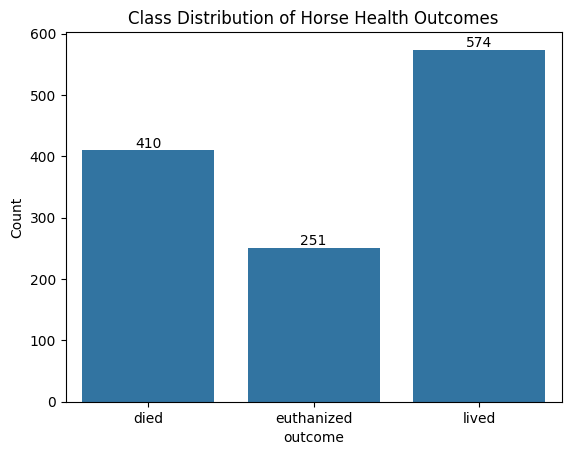

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot
ax = sns.countplot(data=df, x='outcome')

# Add count values on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Add labels and title
plt.title('Class Distribution of Horse Health Outcomes')
plt.xlabel('outcome')
plt.ylabel('Count')

# Show the plot
plt.show()


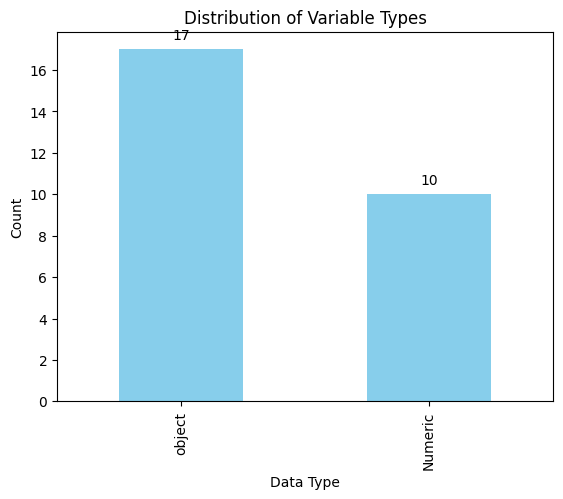

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Combine float and int into 'Numeric'
data_types = df.dtypes.replace(['float64', 'int64'], 'Numeric').value_counts()

# Plot the bar chart
ax = data_types.plot(kind='bar', color='skyblue')

# Annotate the counts on top of each bar
for i, count in enumerate(data_types):
    ax.text(i, count + 0.5, str(count), ha='center', fontsize=10)

# Add labels and title
plt.title('Distribution of Variable Types')
plt.xlabel('Data Type')
plt.ylabel('Count')
plt.show()


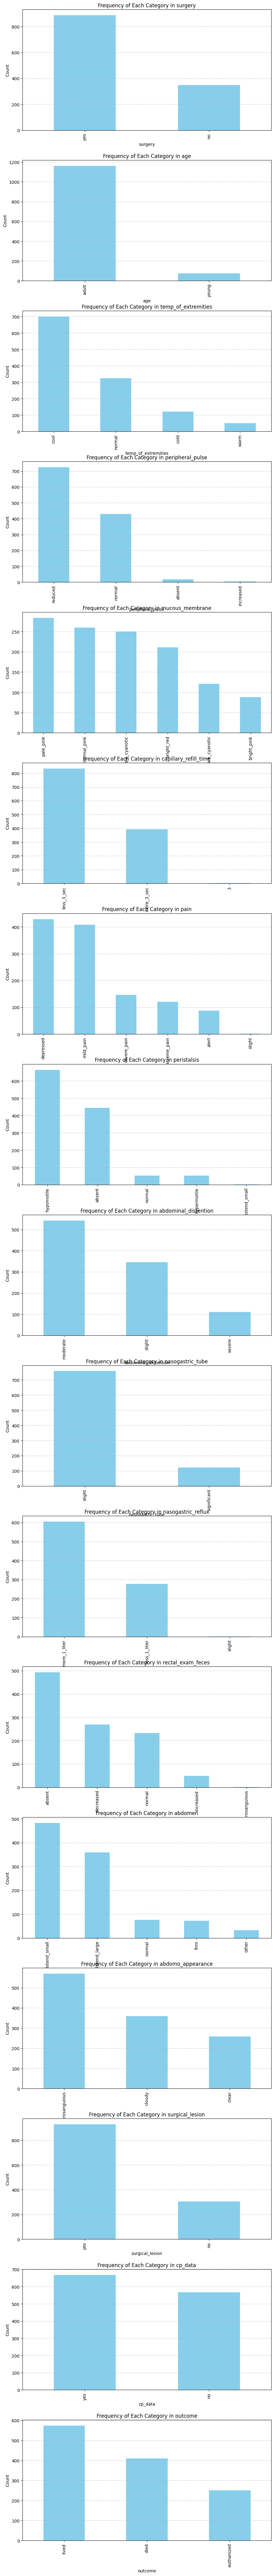

In [32]:
# Select columns of type 'object'
categorical_columns = df.select_dtypes(include=['object']).columns

# Set up the plotting
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 5 * len(categorical_columns)))
fig.tight_layout(pad=5.0)

# Check if there's only one categorical column, handle subplot axes indexing
if len(categorical_columns) == 1:
    axes = [axes]  # Make it iterable

# Loop through each categorical column, plotting its value counts
for ax, column in zip(axes, categorical_columns):
    value_counts = df[column].value_counts()
    value_counts.plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f'Frequency of Each Category in {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [33]:
# Iterate over each column in the DataFrame



for column in df.select_dtypes(include='object').columns:
  df[column] = df[column].astype('category')

# Identify categorical columns excluding the target variable 'outcome'
categorical_cols = df.select_dtypes(include=['category']).columns.drop('outcome')

print(categorical_cols)

# Apply one-hot encoding to all categorical columns
df_encoded = pd.get_dummies(df, columns= categorical_cols)


# Ensure the target 'outcome' is kept as a categorical type and not encoded
df['outcome'] = df['outcome'].astype('category')

# Display the new DataFrame to verify changes
df_encoded.head()


Index(['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'surgical_lesion',
       'cp_data'],
      dtype='object')


,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3,outcome,surgery_no,surgery_yes,age_adult,age_young,temp_of_extremities_cold,temp_of_extremities_cool,temp_of_extremities_normal,temp_of_extremities_warm,peripheral_pulse_absent,peripheral_pulse_increased,peripheral_pulse_normal,peripheral_pulse_reduced,mucous_membrane_bright_pink,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,mucous_membrane_pale_cyanotic,mucous_membrane_pale_pink,capillary_refill_time_3,capillary_refill_time_less_3_sec,capillary_refill_time_more_3_sec,pain_alert,pain_depressed,pain_extreme_pain,pain_mild_pain,pain_severe_pain,pain_slight,peristalsis_absent,peristalsis_distend_small,peristalsis_hypermotile,peristalsis_hypomotile,peristalsis_normal,abdominal_distention_moderate,abdominal_distention_severe,abdominal_distention_slight,nasogastric_tube_significant,nasogastric_tube_slight,nasogastric_reflux_less_1_liter,nasogastric_reflux_more_1_liter,nasogastric_reflux_slight,rectal_exam_feces_absent,rectal_exam_feces_decreased,rectal_exam_feces_increased,rectal_exam_feces_normal,rectal_exam_feces_serosanguious,abdomen_distend_large,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes
0,38.1,132.0,24.0,6.5,57.0,8.5,3.4,2209,0,0,died,False,True,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True,True,False
1,37.5,88.0,12.0,2.0,33.0,64.0,2.0,2208,0,0,euthanized,False,True,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,True,True,False
2,38.3,120.0,28.0,3.5,37.0,6.4,3.4,5124,0,0,lived,False,True,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,True,False
3,37.1,72.0,30.0,2.0,53.0,7.0,3.9,2208,0,0,lived,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,True
4,38.0,52.0,48.0,7.0,47.0,7.3,2.6,0,0,0,lived,True,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,True,False,False,True


In [34]:
# Adjust display settings to show more information
pd.set_option('display.max_rows', None)  # To display all rows if necessary
pd.set_option('display.max_columns', None)  # To display all columns
pd.set_option('display.width', None)  # To remove limit on the display width

#Check the data types of the new DataFrame
print(df_encoded.dtypes)


rectal_temp                          float64
pulse                                float64
respiratory_rate                     float64
nasogastric_reflux_ph                float64
packed_cell_volume                   float64
total_protein                        float64
abdomo_protein                       float64
lesion_1                               int64
lesion_2                               int64
lesion_3                               int64
outcome                             category
surgery_no                              bool
surgery_yes                             bool
age_adult                               bool
age_young                               bool
temp_of_extremities_cold                bool
temp_of_extremities_cool                bool
temp_of_extremities_normal              bool
temp_of_extremities_warm                bool
peripheral_pulse_absent                 bool
peripheral_pulse_increased              bool
peripheral_pulse_normal                 bool
peripheral

In [35]:
#Scale numercial variables
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Identify numerical columns (int64 and float64)
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Initialize the StandardScaler
# scaler = MinMaxScaler() 


# Scale the numerical features
# df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

df = df_encoded
df.head()


,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3,outcome,surgery_no,surgery_yes,age_adult,age_young,temp_of_extremities_cold,temp_of_extremities_cool,temp_of_extremities_normal,temp_of_extremities_warm,peripheral_pulse_absent,peripheral_pulse_increased,peripheral_pulse_normal,peripheral_pulse_reduced,mucous_membrane_bright_pink,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,mucous_membrane_pale_cyanotic,mucous_membrane_pale_pink,capillary_refill_time_3,capillary_refill_time_less_3_sec,capillary_refill_time_more_3_sec,pain_alert,pain_depressed,pain_extreme_pain,pain_mild_pain,pain_severe_pain,pain_slight,peristalsis_absent,peristalsis_distend_small,peristalsis_hypermotile,peristalsis_hypomotile,peristalsis_normal,abdominal_distention_moderate,abdominal_distention_severe,abdominal_distention_slight,nasogastric_tube_significant,nasogastric_tube_slight,nasogastric_reflux_less_1_liter,nasogastric_reflux_more_1_liter,nasogastric_reflux_slight,rectal_exam_feces_absent,rectal_exam_feces_decreased,rectal_exam_feces_increased,rectal_exam_feces_normal,rectal_exam_feces_serosanguious,abdomen_distend_large,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes
0,38.1,132.0,24.0,6.5,57.0,8.5,3.4,2209,0,0,died,False,True,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True,True,False
1,37.5,88.0,12.0,2.0,33.0,64.0,2.0,2208,0,0,euthanized,False,True,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,True,True,False
2,38.3,120.0,28.0,3.5,37.0,6.4,3.4,5124,0,0,lived,False,True,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,True,False
3,37.1,72.0,30.0,2.0,53.0,7.0,3.9,2208,0,0,lived,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,True
4,38.0,52.0,48.0,7.0,47.0,7.3,2.6,0,0,0,lived,True,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,True,False,False,True


In [36]:
# SMOT
from imblearn.over_sampling import SMOTE

X = df.drop('outcome', axis=1)
y = df['outcome']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), 
                          pd.DataFrame(y_resampled, columns=['outcome'])], axis=1)


Feature Selection

Feature importance by random forest

                             feature  importance
5                      total_protein    0.088417
3              nasogastric_reflux_ph    0.079392
6                     abdomo_protein    0.076648
1                              pulse    0.069621
4                 packed_cell_volume    0.057469
7                           lesion_1    0.046400
0                        rectal_temp    0.042659
2                   respiratory_rate    0.040803
62   abdomo_appearance_serosanguious    0.027811
65                        cp_data_no    0.022405
35                  pain_severe_pain    0.018970
10                        surgery_no    0.018206
34                    pain_mild_pain    0.016852
48   nasogastric_reflux_more_1_liter    0.016840
21          peripheral_pulse_reduced    0.016820
37                peristalsis_absent    0.015778
30  capillary_refill_time_more_3_sec    0.014845
15          temp_of_extremities_cool    0.014327
63                surgical_lesion_no    0.014051
64               sur

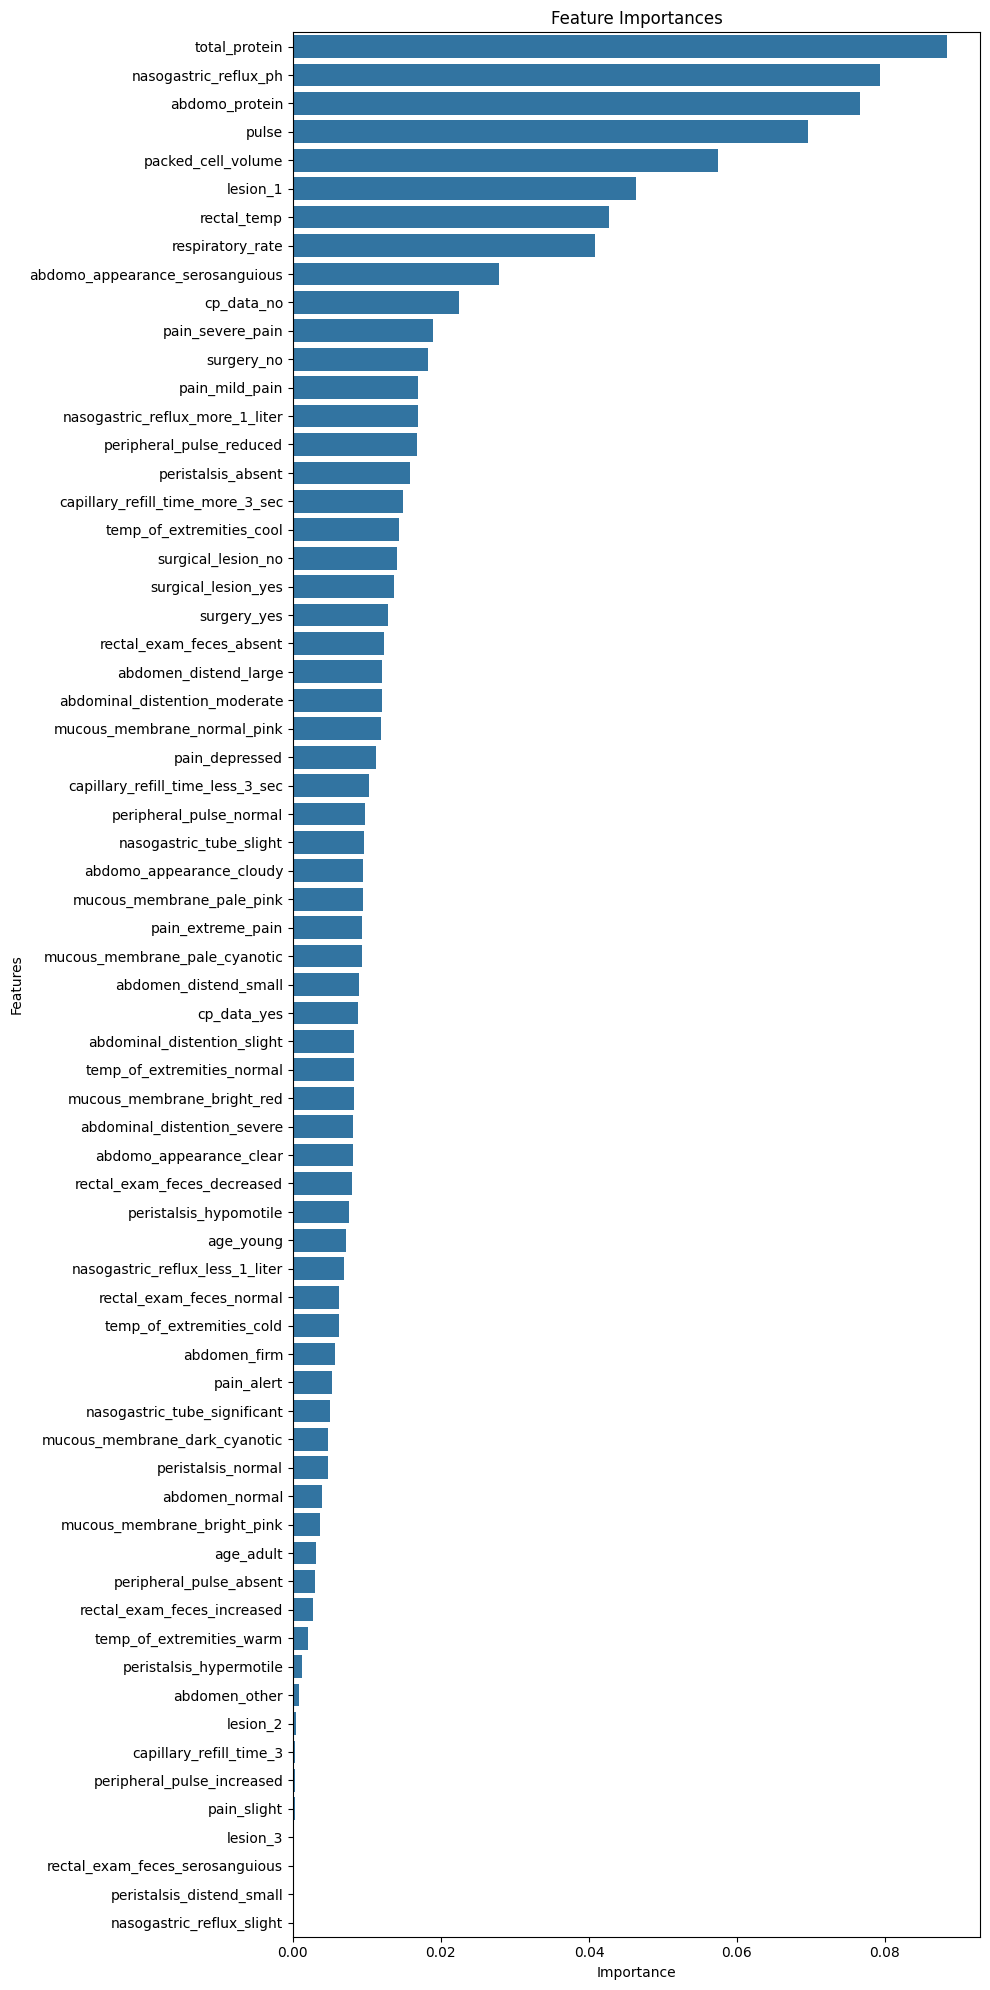

In [37]:
from sklearn.ensemble import RandomForestClassifier
import random

X = df_resampled.drop('outcome', axis=1)
y = df_resampled['outcome']

#random.seed(234567)
random.seed(42)
np.random.seed(42)

# Train a model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
print(feature_importances)

plt.figure(figsize=(10, 20))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')

# Annotate the bars with the importance values
for index, value in enumerate(feature_importances['importance']):
    ax.text(value, index, f'{value:.4f}', va='center')  # Display importance value on the bar

plt.tight_layout()
plt.show()

# Select the top N features (e.g., top 25 features)
#top_n_features = 25
#selected_features_rf = feature_importances['feature'].head(top_n_features)

# Create a new DataFrame with only the selected features
#df_selected_features_rf = df[selected_features_rf].copy()
#df_selected_features_rf['outcome'] = y  # Add the target variable to the new DataFrame

# Display the new DataFrame to verify
#print("New DataFrame with Random Forest Selected Features (df_selected_features_rf):")
#print(df_selected_features_rf.head())
#print("\nShape of df_selected_features_rf:", df_selected_features_rf.shape)
#print("\nColumns in df_selected_features_rf:", df_selected_features_rf.columns.tolist())

Recursive Feature Elimination

In [38]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df_resampled.drop(columns='outcome')
y = df_resampled['outcome']


random.seed(42)
np.random.seed(42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize RFE with the number of features to select (e.g., 10 most important features)
rfe = RFE(estimator=rf, n_features_to_select=25)

# Fit the RFE model
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

# Train the RandomForest model with only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

rf.fit(X_train_selected, y_train)

# Make predictions and evaluate the model
y_pred = rf.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with selected features: {accuracy:.4f}")


Selected Features: Index(['rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph',
       'packed_cell_volume', 'total_protein', 'abdomo_protein', 'lesion_1',
       'surgery_no', 'surgery_yes', 'temp_of_extremities_cool',
       'peripheral_pulse_reduced', 'capillary_refill_time_more_3_sec',
       'pain_depressed', 'pain_mild_pain', 'pain_severe_pain',
       'peristalsis_absent', 'abdominal_distention_moderate',
       'nasogastric_reflux_more_1_liter', 'rectal_exam_feces_absent',
       'abdomen_distend_large', 'abdomo_appearance_serosanguious',
       'surgical_lesion_no', 'surgical_lesion_yes', 'cp_data_no'],
      dtype='object')
Accuracy with selected features: 0.7544


In [39]:
# Create a new DataFrame with only the selected features for future use
df_selected_features_rfe = df_resampled[selected_features]
df_selected_features_rfe['outcome'] = y  # Add the target variable to the new DataFrame

df_selected_features_rfe.head()

C:\Users\user\AppData\Local\Temp\ipykernel_101076\525581275.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_features_rfe['outcome'] = y  # Add the target variable to the new DataFrame


,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,surgery_no,surgery_yes,temp_of_extremities_cool,peripheral_pulse_reduced,capillary_refill_time_more_3_sec,pain_depressed,pain_mild_pain,pain_severe_pain,peristalsis_absent,abdominal_distention_moderate,nasogastric_reflux_more_1_liter,rectal_exam_feces_absent,abdomen_distend_large,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes,cp_data_no,outcome
0,38.1,132.0,24.0,6.5,57.0,8.5,3.4,2209,False,True,True,True,True,True,False,False,True,False,False,False,False,True,False,True,True,died
1,37.5,88.0,12.0,2.0,33.0,64.0,2.0,2208,False,True,True,False,True,False,True,False,True,True,True,True,False,True,False,True,True,euthanized
2,38.3,120.0,28.0,3.5,37.0,6.4,3.4,5124,False,True,True,True,False,False,False,False,False,True,False,False,True,True,False,True,True,lived
3,37.1,72.0,30.0,2.0,53.0,7.0,3.9,2208,False,True,False,True,True,False,True,False,False,True,True,False,False,False,False,True,False,lived
4,38.0,52.0,48.0,7.0,47.0,7.3,2.6,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,lived


CatBoost

In [40]:
!pip install catboost


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [41]:
original_df = "C:/Users/user/Downloads/train.csv"
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset (assuming 'df' is a pandas DataFrame and 'outcome' is the target variable)
X = df_resampled.drop(columns='outcome')  # Features
y = df_resampled['outcome']  # Target

random.seed(42)
np.random.seed(42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Specify the column indices of categorical features (optional)
categorical_features_indices = [i for i, col in enumerate(X.columns) if X[col].dtype == 'object']

# Initialize CatBoostClassifier
# catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, 
#                                    cat_features=categorical_features_indices, verbose=100)
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.01, depth=6, 
                                    cat_features=categorical_features_indices, verbose=100)

# Train the model
catboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = catboost_model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Get feature importance scores from the CatBoost model
catboost_importances = catboost_model.get_feature_importance()

# Create a DataFrame with features and their importance scores
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': catboost_importances
})

# Sort features by importance in descending order
feature_importances.sort_values(by='importance', ascending=False, inplace=True)

# Print the feature importances
print("CatBoost Selected Features and their Importance Scores:")
print(feature_importances)

0:	learn: 1.0930930	total: 21.2ms	remaining: 21.2s
100:	learn: 0.7835579	total: 1.45s	remaining: 12.9s
200:	learn: 0.6582850	total: 2.88s	remaining: 11.4s
300:	learn: 0.5863976	total: 4.21s	remaining: 9.78s
400:	learn: 0.5373229	total: 5.65s	remaining: 8.45s
500:	learn: 0.4982026	total: 7.01s	remaining: 6.99s
600:	learn: 0.4670322	total: 8.49s	remaining: 5.63s
700:	learn: 0.4377674	total: 9.86s	remaining: 4.21s
800:	learn: 0.4135838	total: 11.3s	remaining: 2.8s
900:	learn: 0.3919906	total: 12.7s	remaining: 1.39s
999:	learn: 0.3725015	total: 14.1s	remaining: 0us
Accuracy: 0.7795
CatBoost Selected Features and their Importance Scores:
                             feature  importance
5                      total_protein   12.299792
3              nasogastric_reflux_ph    9.375751
1                              pulse    7.550560
7                           lesion_1    6.082224
6                     abdomo_protein    5.226671
10                        surgery_no    5.213099
4               

In [43]:
# Select the top N features (e.g., top 25 most important features)
top_n_features = 25
selected_features_catboost = feature_importances['feature'].head(top_n_features)

# Create a new DataFrame with only the selected features
df_selected_features_catboost = df_resampled[selected_features_catboost].copy()
df_selected_features_catboost['outcome'] = y  # Add the target variable to the new DataFrame

# Display the new DataFrame to verify
print("New DataFrame with CatBoost Selected Features (df_selected_features_catboost):")
print(df_selected_features_catboost.head())
print("\nShape of df_selected_features_catboost:", df_selected_features_catboost.shape)
print("\nColumns in df_selected_features_catboost:", df_selected_features_catboost.columns.tolist())

New DataFrame with CatBoost Selected Features (df_selected_features_catboost):
   total_protein  nasogastric_reflux_ph  pulse  lesion_1  abdomo_protein  \
0            8.5                    6.5  132.0      2209             3.4   
1           64.0                    2.0   88.0      2208             2.0   
2            6.4                    3.5  120.0      5124             3.4   
3            7.0                    2.0   72.0      2208             3.9   
4            7.3                    7.0   52.0         0             2.6   

   surgery_no  packed_cell_volume  respiratory_rate  rectal_temp  \
0       False                57.0              24.0         38.1   
1       False                33.0              12.0         37.5   
2       False                37.0              28.0         38.3   
3       False                53.0              30.0         37.1   
4        True                47.0              48.0         38.0   

   pain_severe_pain  rectal_exam_feces_absent  \
0     

Rank features and choose top N 

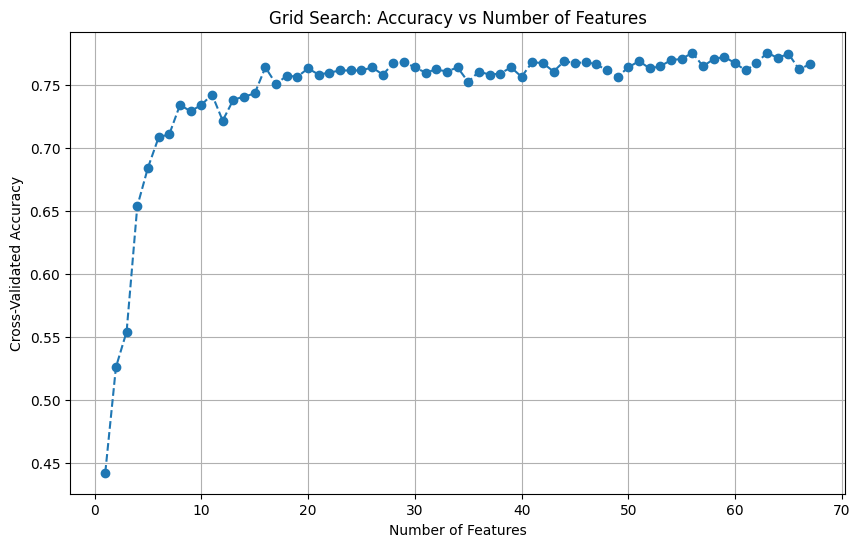

Optimal number of features: 56
Selected features: ['rectal_temp' 'pulse' 'respiratory_rate' 'nasogastric_reflux_ph'
 'packed_cell_volume' 'total_protein' 'abdomo_protein' 'lesion_1'
 'surgery_no' 'surgery_yes' 'temp_of_extremities_cool'
 'peripheral_pulse_reduced' 'capillary_refill_time_more_3_sec'
 'pain_depressed' 'pain_mild_pain' 'pain_severe_pain' 'peristalsis_absent'
 'abdominal_distention_moderate' 'nasogastric_reflux_more_1_liter'
 'rectal_exam_feces_absent' 'abdomen_distend_large'
 'abdomo_appearance_serosanguious' 'surgical_lesion_no'
 'surgical_lesion_yes' 'cp_data_no' 'mucous_membrane_normal_pink'
 'abdomo_appearance_cloudy' 'capillary_refill_time_less_3_sec'
 'peripheral_pulse_normal' 'nasogastric_tube_slight'
 'mucous_membrane_pale_pink' 'pain_extreme_pain'
 'mucous_membrane_pale_cyanotic' 'abdomen_distend_small' 'cp_data_yes'
 'abdominal_distention_slight' 'temp_of_extremities_normal'
 'mucous_membrane_bright_red' 'abdominal_distention_severe'
 'abdomo_appearance_clear' '

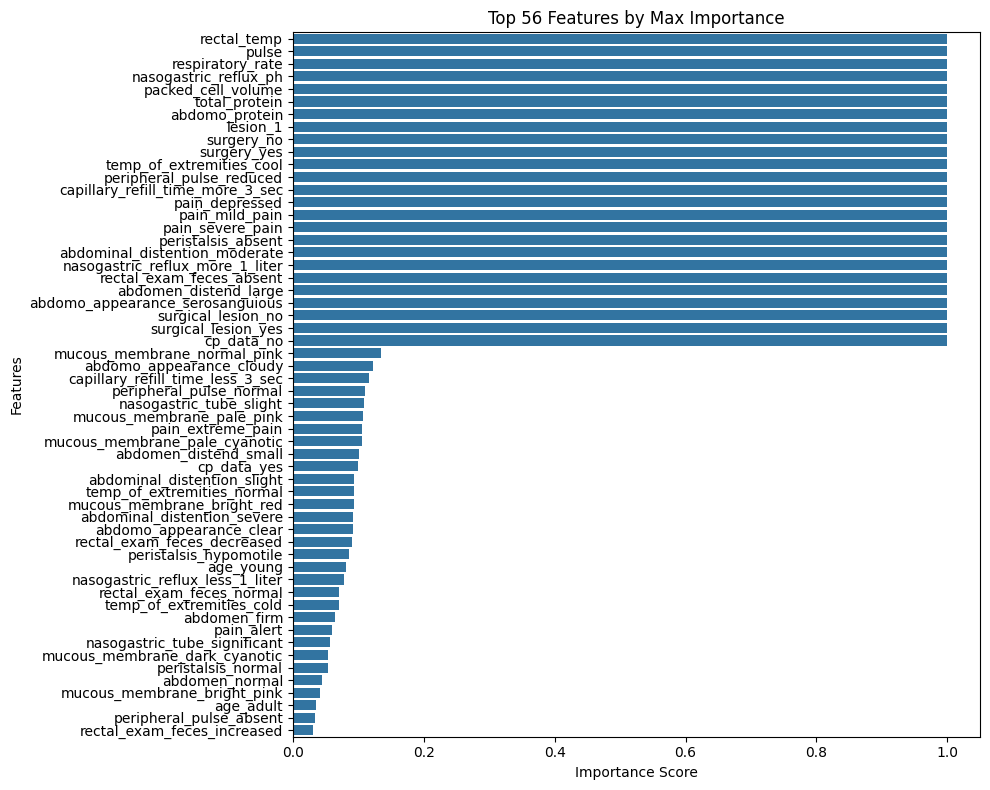

In [44]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

random.seed(42)
np.random.seed(42)

# Step 1: Prepare data (split into training and test sets)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Combine feature importance results into a DataFrame
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'rf_importance': model.feature_importances_,
    'rfe_importance': np.where(rfe.support_, 1, 0),
    'catboost_importance': catboost_model.get_feature_importance()
})

# Standardize feature importance scores (scale between 0 and 1)
scaler = MinMaxScaler()
feature_importances[['rf_importance', 'rfe_importance', 'catboost_importance']] = scaler.fit_transform(
    feature_importances[['rf_importance', 'rfe_importance', 'catboost_importance']]
)

# Step 2: Grid search to find the optimal number of features
# Initialize the classifier
rf = RandomForestClassifier(random_state=42)

# Store results for accuracy and the corresponding number of features
accuracies = []
num_features_list = []

# Step 3: Test model performance with top N features based on individual importance methods
for N in range(1, len(feature_importances) + 1):
    # Sort features based on the maximum importance score across methods
    feature_importances['max_importance'] = feature_importances[['rf_importance', 'rfe_importance', 'catboost_importance']].max(axis=1)
    top_features = feature_importances.nlargest(N, 'max_importance')['feature']
    
    # Select only the top N features from the training data
    X_train_selected = X_train[top_features]
    
    # Perform cross-validation to evaluate the accuracy with the top N features
    cv_scores = cross_val_score(rf, X_train_selected, y_train, cv=5, scoring='accuracy')
    mean_cv_score = np.mean(cv_scores)
    
    # Store the results
    accuracies.append(mean_cv_score)
    num_features_list.append(N)

# Step 4: Plot Accuracy vs Number of Features
plt.figure(figsize=(10, 6))
plt.plot(num_features_list, accuracies, marker='o', linestyle='--')
plt.title('Grid Search: Accuracy vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)
plt.show()

# Step 5: Choose the optimal number of features (based on max accuracy)
optimal_num_features = num_features_list[np.argmax(accuracies)]
print(f"Optimal number of features: {optimal_num_features}")

# Select the optimal features based on max importance
top_features_optimal = feature_importances.nlargest(optimal_num_features, 'max_importance')['feature']
print(f"Selected features: {top_features_optimal.values}")

# Step 6: Train RandomForest using only the selected optimal number of features
X_train_selected = X_train[top_features_optimal]
X_test_selected = X_test[top_features_optimal]

# Fit the model
rf_selected = RandomForestClassifier(random_state=42)
rf_selected.fit(X_train_selected, y_train)

# Make predictions and validate the model
y_pred = rf_selected.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with selected features: {accuracy:.4f}")

# Step 7: Visualize the top selected features' importance scores
plt.figure(figsize=(10, 8))
sns.barplot(x='max_importance', y='feature', data=feature_importances.nlargest(optimal_num_features, 'max_importance'))
plt.title(f'Top {optimal_num_features} Features by Max Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()




In [45]:
# Select the top features from the original dataset
df_selected_features = df_resampled[top_features_optimal]

#df_selected_features = df[top_features_15]

df_selected_features['outcome'] = df_resampled['outcome']

df_selected_features.head()

C:\Users\user\AppData\Local\Temp\ipykernel_101076\4285492412.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_features['outcome'] = df_resampled['outcome']


,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,surgery_no,surgery_yes,temp_of_extremities_cool,peripheral_pulse_reduced,capillary_refill_time_more_3_sec,pain_depressed,pain_mild_pain,pain_severe_pain,peristalsis_absent,abdominal_distention_moderate,nasogastric_reflux_more_1_liter,rectal_exam_feces_absent,abdomen_distend_large,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes,cp_data_no,mucous_membrane_normal_pink,abdomo_appearance_cloudy,capillary_refill_time_less_3_sec,peripheral_pulse_normal,nasogastric_tube_slight,mucous_membrane_pale_pink,pain_extreme_pain,mucous_membrane_pale_cyanotic,abdomen_distend_small,cp_data_yes,abdominal_distention_slight,temp_of_extremities_normal,mucous_membrane_bright_red,abdominal_distention_severe,abdomo_appearance_clear,rectal_exam_feces_decreased,peristalsis_hypomotile,age_young,nasogastric_reflux_less_1_liter,rectal_exam_feces_normal,temp_of_extremities_cold,abdomen_firm,pain_alert,nasogastric_tube_significant,mucous_membrane_dark_cyanotic,peristalsis_normal,abdomen_normal,mucous_membrane_bright_pink,age_adult,peripheral_pulse_absent,rectal_exam_feces_increased,outcome
0,38.1,132.0,24.0,6.5,57.0,8.5,3.4,2209,False,True,True,True,True,True,False,False,True,False,False,False,False,True,False,True,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,died
1,37.5,88.0,12.0,2.0,33.0,64.0,2.0,2208,False,True,True,False,True,False,True,False,True,True,True,True,False,True,False,True,True,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,euthanized
2,38.3,120.0,28.0,3.5,37.0,6.4,3.4,5124,False,True,True,True,False,False,False,False,False,True,False,False,True,True,False,True,True,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,lived
3,37.1,72.0,30.0,2.0,53.0,7.0,3.9,2208,False,True,False,True,True,False,True,False,False,True,True,False,False,False,False,True,False,False,True,False,False,True,True,False,False,True,True,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,lived
4,38.0,52.0,48.0,7.0,47.0,7.3,2.6,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,True,True,True,False,False,False,False,True,False,True,False,False,False,False,True,False,True,True,False,False,True,False,False,False,True,False,True,False,False,lived


Machine Learning Models

Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, classification_report

# Split the data into features (X) and target (y)
X = df_selected_features.drop(columns=['outcome'])  
y = df_selected_features['outcome'] 

# Standardize the feature data
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

random.seed(42)
np.random.seed(42)

# Generate polynomial features (degree=2)
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
#X_poly = poly.fit_transform(X_scaled)

# Split the dataset into training and testing sets (70% train, 30% test)
#X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], 
    'solver': ['newton-cg', 'lbfgs', 'saga']
}

# Initialize the GridSearchCV object with cross-validation
grid_search = GridSearchCV(LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42), 
                           param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Use the best model found by GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Polynomial Features: {accuracy:.4f}")

# Print classification report for detailed performance metrics
print("Classification Report with Polynomial Features:")
print(classification_report(y_test, y_pred))

# Cross-validated accuracy for a better estimate
# cv_scores = cross_val_score(best_model, X_poly, y, cv=5, scoring='accuracy')
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print(f"Mean Cross-Validated Accuracy with Polynomial Features: {cv_scores.mean():.4f}")




C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1

Accuracy with Polynomial Features: 0.7544
Classification Report with Polynomial Features:
              precision    recall  f1-score   support

        died       0.69      0.83      0.75       166
  euthanized       0.81      0.72      0.76       170
       lived       0.78      0.72      0.75       181

    accuracy                           0.75       517
   macro avg       0.76      0.76      0.75       517
weighted avg       0.76      0.75      0.75       517



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1

Mean Cross-Validated Accuracy with Polynomial Features: 0.7068


SVM

In [47]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'df_selected_features' contains the selected features and the 'outcome' column as the target
# Example: df_selected_features['outcome'] is the target variable and other columns are features

# Step 1: Data Preparation
X = df_selected_features.drop(columns=['outcome'])  # Independent variables (selected features)
y = df_selected_features['outcome']  # Dependent variable (target)

random.seed(42)
np.random.seed(42)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features (important for SVM)
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Initialize the SVM model
# Here we use a linear kernel, but we can optimize this later using GridSearchCV
svm_model = SVC(kernel='linear', decision_function_shape='ovr', random_state=42)

# Step 3: Train the SVM model
#svm_model.fit(X_train_scaled, y_train)
svm_model.fit(X_train_scaled, y_train)

# Step 4: Make predictions on the test set
#y_pred = svm_model.predict(X_test_scaled)
y_pred = svm_model.predict(X_test_scaled)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report for detailed performance metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7331
Classification Report:
              precision    recall  f1-score   support

        died       0.68      0.79      0.73       166
  euthanized       0.77      0.75      0.76       170
       lived       0.75      0.66      0.71       181

    accuracy                           0.73       517
   macro avg       0.74      0.74      0.73       517
weighted avg       0.74      0.73      0.73       517



KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'df_selected_features' contains the selected features and the 'outcome' column as the target
# Example: df_selected_features['outcome'] is the target variable and other columns are features

# Step 1: Data Preparation
X = df_selected_features.drop(columns=['outcome'])  # Independent variables (selected features)
y = df_selected_features['outcome']  # Dependent variable (target)

random.seed(42)
np.random.seed(42)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Feature Scaling (important for KNN)
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Initialize the KNN model
# Start with k=5 (you can tune this later)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Step 4: Train the KNN model
#knn_model.fit(X_train_scaled, y_train)
knn_model.fit(X_train_scaled, y_train)

# Step 5: Make predictions on the test set
#y_pred = knn_model.predict(X_test_scaled)
y_pred = knn_model.predict(X_test_scaled)


# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report for detailed performance metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7350
Classification Report:
              precision    recall  f1-score   support

        died       0.65      0.80      0.72       166
  euthanized       0.81      0.75      0.78       170
       lived       0.78      0.66      0.71       181

    accuracy                           0.74       517
   macro avg       0.74      0.74      0.74       517
weighted avg       0.75      0.74      0.74       517



Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assuming 'df_selected_features' contains the selected features and the 'outcome' column as the target
# Example: df_selected_features['outcome'] is the target variable and other columns are features

# Step 1: Data Preparation
X = df_selected_features.drop(columns=['outcome'])  # Independent variables (selected features)
y = df_selected_features['outcome']  # Dependent variable (target)

random.seed(42)
np.random.seed(42)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Initialize the Random Forest model
# You can start with default parameters and tune them later
rf_model = RandomForestClassifier(random_state=42)

# Step 3: Train the Random Forest model
rf_model.fit(X_train_scaled, y_train)

# Step 4: Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report for detailed performance metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7814
Classification Report:
              precision    recall  f1-score   support

        died       0.71      0.89      0.79       166
  euthanized       0.82      0.80      0.81       170
       lived       0.84      0.66      0.74       181

    accuracy                           0.78       517
   macro avg       0.79      0.78      0.78       517
weighted avg       0.79      0.78      0.78       517



In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assuming 'df_selected_features' contains the selected features and the 'outcome' column as the target
# Example: df_selected_features['outcome'] is the target variable and other columns are features

# Step 1: Data Preparation
X = df_selected_features.drop(columns=['outcome'])  # Independent variables (selected features)
y = df_selected_features['outcome']  # Dependent variable (target)

random.seed(42)
np.random.seed(42)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Initialize the Random Forest model
# You can start with default parameters and tune them later

# class_weights = {'died': 3.0, 'euthanized': 2.5, 'lived': 1.0}  # Adjust weights as needed

# Step 2: Initialize the Random Forest model with custom class weights
#rf_model = RandomForestClassifier(random_state=42, class_weight=class_weights)

rf_model = RandomForestClassifier(random_state=42)

# Step 3: Train the Random Forest model
rf_model.fit(X_train_scaled, y_train)

# Step 4: Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report for detailed performance metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7814
Classification Report:
              precision    recall  f1-score   support

        died       0.71      0.89      0.79       166
  euthanized       0.82      0.80      0.81       170
       lived       0.84      0.66      0.74       181

    accuracy                           0.78       517
   macro avg       0.79      0.78      0.78       517
weighted avg       0.79      0.78      0.78       517



In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Assuming 'df_selected_features' contains the selected features and the 'outcome' column as the target

# Step 1: Data Preparation
X = df_selected_features.drop(columns=['outcome'])  # Independent variables (selected features)
y = df_selected_features['outcome']  # Dependent variable (target)

random.seed(42)
np.random.seed(42)

# Feature Scaling (optional for RandomForest, but useful for comparison with other models)
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Step 2: Initialize RandomForestClassifier with hyperparameter tuning
#param_grid = {
#    'n_estimators': [100, 200, 300],  # Number of trees
#    'max_depth': [None, 10, 20, 30],  # Max depth of the trees
#    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
#    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
#    'bootstrap': [True, False]        # Method of selecting samples for training each tree
#}


#param_grid = {
#    'n_estimators': [100, 200, 300],  # Number of trees
#    'max_depth': [None, 10, 20, 30],  # Max depth of the trees
#    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
#    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
#    'bootstrap': [True, False],       # Method of selecting samples for training each tree
#    'class_weight': [
#        {'died': 1.5, 'euthanized': 1.0, 'lived': 1.0},
#        {'died': 2.0, 'euthanized': 1.0, 'lived': 1.0},
#        {'died': 2.5, 'euthanized': 1.0, 'lived': 1.0},
#        {'died': 3.0, 'euthanized': 1.0, 'lived': 1.0},
#        {'died': 2.0, 'euthanized': 1.2, 'lived': 0.8},
#        {'died': 2.0, 'euthanized': 1.5, 'lived': 1.0}
#    ]
#}

param_grid = {
    'n_estimators': [500],  # Number of trees
    
    'min_samples_split': [2],  # Minimum number of samples required to split an internal node 2
    'min_samples_leaf': [1],    # Minimum number of samples required to be at a leaf node 1
    'bootstrap': [True],       # Method of selecting samples for training each tree
    'criterion': ['gini'],  # Include both options for tuning
    # 'class_weight': [
    #    {'died': 3.0, 'euthanized': 2.5, 'lived': 1.0},
        #{'died': 2.5, 'euthanized': 2.5, 'lived': 1.0},
        #{'died': 2.5, 'euthanized': 2.0, 'lived': 1.0},
        #{'died': 2.5, 'euthanized': 2.5, 'lived': 1.0}
    #]
    
}


# GridSearchCV for hyperparameter tuning
# Define a custom class weight dictionary




# rf_model = RandomForestClassifier(random_state=42, class_weight="balanced")
rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

# Step 3: Train the model using GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Best parameters from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Step 4: Make predictions on the test set
y_pred = best_rf_model.predict(X_test_scaled)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report for detailed performance metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Cross-validation (for more reliable accuracy estimate)
cv_scores = cross_val_score(best_rf_model, X, y, cv=10, scoring='accuracy')
print(f"Cross-Validated Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Accuracy: 0.7950
Classification Report:
              precision    recall  f1-score   support

        died       0.72      0.89      0.80       166
  euthanized       0.84      0.82      0.83       170
       lived       0.85      0.69      0.76       181

    accuracy                           0.79       517
   macro avg       0.80      0.80      0.79       517
weighted avg       0.80      0.79      0.79       517

Cross-Validated Accuracy: 0.7916 ± 0.0656


Neural Network 

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Data Preparation
X = df_selected_features.drop(columns=['outcome'])  # Features
y = df_selected_features['outcome']  # Target

random.seed(42)
np.random.seed(42)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)  # One-hot encoding for neural network output

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Define Neural Network Architecture
model = Sequential([
    Dense(units = 30, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)),
    #BatchNormalization(),  # Normalize layer inputs
    # Dense(256, activation='relu'),
    Dense(units=30, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(units=30, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(units=30, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(units=30, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(units=30, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(units=30, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(units=30, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(units=30, activation='relu', kernel_regularizer=l2(0.01)),
    
    
    #Dropout(0.4),  # Adjust dropout for regularization
    #BatchNormalization(),
    #Dense(128, activation='relu'),
    #Dropout(0.3),
    #BatchNormalization(),
    #Dense(64, activation='relu'),
    #Dropout(0.2),
    #BatchNormalization(),
    Dense(y_categorical.shape[1], activation='softmax')  # Output layer


])

# Step 3: Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train the Model with Early Stopping and Class Weights
# Calculate class weights to emphasize the "euthanized" class
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_encoded),
    y=y_encoded
)

# Manually adjust class weights (increase weight for "euthanized" class)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}
class_weights_dict[1] *= 1.5  # Increase weight for "euthanized" class

#early_stopping = EarlyStopping(monitor='val_loss', restore_best_weights=True)




weight_combinations = [
    #{0: 2.5, 1: 2.5, 2: 1.0},
    {0: 1.0, 1: 1.0, 2: 1.0},
    #{0: 1.0, 1: 1.5, 2: 1.5},
]



for weights in weight_combinations:
    print(f"Testing with weights: {weights}")
    history = model.fit(
        X_train, y_train,
        epochs=1000,  # Maximum epochs
        batch_size=32,  # Optimized batch size
        validation_split=0.3,  # Use 20% of training data for validation
        # class_weight=class_weights_dict,  # Apply class weights
        class_weight=weights, 
        #callbacks=[early_stopping],  # Early stopping callback
        verbose=1
    )

    # Step 5: Evaluate the Model
    y_pred_proba = model.predict(X_test)
    y_pred = np.argmax(y_pred_proba, axis=1)  # Convert probabilities to class labels
    y_test_labels = np.argmax(y_test, axis=1)

    # Decode predictions back to original labels for readability
    y_pred_labels = label_encoder.inverse_transform(y_pred)
    y_test_labels_decoded = label_encoder.inverse_transform(y_test_labels)

    # Calculate accuracy and display classification report
    accuracy = accuracy_score(y_test_labels_decoded, y_pred_labels)
    print(f"Neural Network Accuracy: {accuracy:.4f}")
    print("Classification Report for Neural Network:")
    print(classification_report(y_test_labels_decoded, y_pred_labels))

    # Step 6: Plot Training and Validation Loss/Accuracy
    def plot_training_history(history):
        plt.figure(figsize=(12, 6))
    # Loss Plot
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
    # Accuracy Plot
        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.tight_layout()
        plt.show()

        plot_training_history(history)



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing with weights: {0: 1.0, 1: 1.0, 2: 1.0}
Epoch 1/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.3584 - loss: 9.8636 - val_accuracy: 0.3177 - val_loss: 3.4340
Epoch 2/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4219 - loss: 3.2761 - val_accuracy: 0.3398 - val_loss: 3.1080
Epoch 3/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3840 - loss: 2.9993 - val_accuracy: 0.3398 - val_loss: 2.8097
Epoch 4/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4636 - loss: 2.6210 - val_accuracy: 0.4365 - val_loss: 2.5370
Epoch 5/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3935 - loss: 2.5214 - val_accuracy: 0.3425 - val_loss: 2.2856
Epoch 6/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4037 - loss: 2.2367 - val_accuracy: 0.4807 - val_loss: 2.1818
Epoch 7/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4754 - loss: 2.1208 - val_accuracy: 0.5359 - val_loss: 2.0273
Epoch 8/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/ste

In [115]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Step 1: Data Preparation
X = df_selected_features.drop(columns=['outcome'])  # Independent variables (selected features)
y = df_selected_features['outcome']  # Dependent variable (target)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Define the base models
base_models = [
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('logistic', LogisticRegression(random_state=42))
]

# Step 3: Define the meta-model (e.g., Logistic Regression)
meta_model = LogisticRegression()

# Step 4: Create the StackingClassifier with base models and meta-model
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Step 5: Train the Stacking Ensemble
stacking_model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred_stacking = stacking_model.predict(X_test)

# Step 7: Evaluate the Stacking Ensemble model
print(classification_report(y_test, y_pred_stacking))

              precision    recall  f1-score   support

        died       0.65      0.73      0.69       110
  euthanized       0.80      0.59      0.68        82
       lived       0.74      0.78      0.76       179

    accuracy                           0.72       371
   macro avg       0.73      0.70      0.71       371
weighted avg       0.73      0.72      0.72       371

